In [1]:
import lorm
from nfft import nfft
import disc.energy_curveling_2d
from IPython.display import display
#from ipywidgets import VBox, HBox, Checkbox, jslink
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time

In [81]:
N_half = 30
m = 2*N_half
x = np.linspace(-0.5,0.5,m,endpoint=False)
x1,x2 = np.meshgrid(x,x)
quat_nodes = np.array([x1.ravel()[:],x2.ravel()[:]]).transpose()
#sample = 1.2*(np.loadtxt('data/spock.uo')-np.array([0.5,0.5,0.45]))
#mu = np.zeros([m**3],dtype=np.float)
#for s in sample:
#    mu[:] += np.exp(-30000*((quat_nodes[:,0]-s[1])**2+(quat_nodes[:,1]-s[2])**2+(quat_nodes[:,2]+s[0])**2))
#plt.imshow(mu.reshape([m,m,m])[:,:,10],vmin=0)#,vmax=1)
len(quat_nodes)

3600

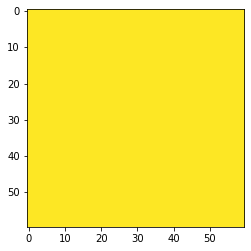

In [82]:
%matplotlib inline
mu=np.ones(len(quat_nodes))#loadtxt('spock_voxel.txt')
m=int(mu.shape[0]**(1./2))
plt.imshow(mu.reshape([m,m])[:,:],vmin=0)#,vmax=1)
#np.savetxt('spock_voxel.txt',mu)

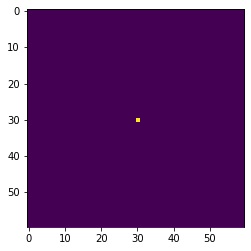

In [83]:
#mu = np.zeros([m**3],dtype=np.float)
#mu[:] = nn.exp(-10*(quat_nodes[:,0]**2+quat_nodes[:,1]**2+quat_nodes[:,2]**2))
#mu[:] = (quat_nodes[:,0]**2+quat_nodes[:,1]**2+quat_nodes[:,2]**2) < 0.45**2
#mu[:]-= (quat_nodes[:,0]**2+quat_nodes[:,1]**2+quat_nodes[:,2]**2) < 0.4**2
#plt.imshow(mu.reshape([m,m,m])[:,N_half,:],vmin=0,vmax=1)
nfft2d = nfft.NFFT2D(m**2,2*N_half,2*N_half)
nfft2d.x = quat_nodes
nfft2d.precompute_x()
nfft2d.f = mu/m**2
nfft2d.adjoint()
mu_hat = np.zeros([2*N_half,2*N_half],dtype=np.complex)
mu_hat[:] = nfft2d.f_hat/nfft2d.f_hat[N_half,N_half]
plt.imshow(np.real(mu_hat[:,:]))

In [84]:
e2 = lorm.manif.EuclideanSpace(2)
points = lorm.manif.ManifoldPointArray(e2)
m = 200
#points.coords = 0.3*(np.random.rand(m,2)-0.5)
points.coords = np.zeros([m,2])
t = np.linspace(0,2*np.pi,m,endpoint=False)
points.coords[:,0] = 0.3*np.sin(t)
points.coords[:,1] = 0.3*np.cos(t)
#points.coords = np.loadtxt('.txt')

In [85]:
N=2*N_half
m = points.coords.shape[0]
energy = disc.energy_curveling_2d.plan(m,N,0.001,2)
energy._mu_hat[:] = mu_hat
m

200

<IPython.core.display.Javascript object>


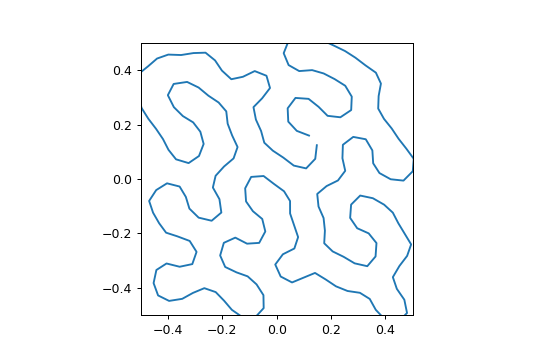

In [86]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot()
ax.axis(np.array([-0.5,0.5,-0.5,0.5]))
ax.axes.set_aspect(1)
line = plt.Line2D(points.coords[:,0],points.coords[:,1])
ax.add_line(line)
def update_points(p):
    line.set_xdata(p.coords[:,0])
    line.set_ydata(p.coords[:,1])
    fig.canvas.draw()
    #time.sleep(.1)
    return

In [92]:
method = lorm.optim.SteepestDescentMethod(max_iter=40)
method = lorm.optim.ConjugateGradientMethod(max_iter=50)#,tol_grad=1e-10)
method.listener = update_points
#points_new = lorm.manif.ManifoldPointArray(e2)
#points_new.coords = points.coords
for i in range(1):
    points_new = method.run(energy,points_new)

Initial value: f[0] = 0.013097660416874057
f[1] = 0.013097594169270376
f[2] = 0.013097401048931956
f[3] = 0.013097292248415236
f[4] = 0.013097185485663274
f[5] = 0.01309710684576375
f[6] = 0.013097037207600038
f[7] = 0.013096976717976782
f[8] = 0.013096933793492577
f[9] = 0.01309689865748415
f[10] = 0.013096865520926891
f[11] = 0.013096838501194042
f[12] = 0.013096808987896162
f[13] = 0.013096779216732034
f[14] = 0.013096746300328282
f[15] = 0.013096719633612343
f[16] = 0.013096698986532061
f[17] = 0.013096682481394239
f[18] = 0.013096668015578204
f[19] = 0.013096657167370296
f[20] = 0.013096647411673688
f[21] = 0.013096639595425404
f[22] = 0.013096633455739245
f[23] = 0.013096628264337634
f[24] = 0.013096623322909087
f[25] = 0.013096618408240827
f[26] = 0.013096614273279928
f[27] = 0.013096610523527964
f[28] = 0.013096607303642045
f[29] = 0.013096604426098217
f[30] = 0.013096601392194948
f[31] = 0.013096598842940904
f[32] = 0.013096596638739518
f[33] = 0.013096594607198345
f[34] = 0.0

In [47]:
#points_new.coords = temp
tempc = points_new.coords
m2 = len(tempc)
temp = np.zeros([2*m2,2])
for i in range(m2):
    temp[2*i,:] = tempc[i,:]
for i in range(m2-1):
    temp[2*i+1,:] = (tempc[i,:]+tempc[i+1,:])/2
temp[2*m2-1,:] = (tempc[0,:]+tempc[m2-1,:])/2

m = len(temp)
points.coords = temp

In [675]:
#Lebesgue measure alpha=0.001, N=60 (N=50 is ok), p=2 (higher orders p lead to similar curves):
# m=200, start with circle, err:0.013483
# m=400, start with result from above, err:0.012651
# m=800, start with result from above, err:0.012489
# m=1600, start with result from above, err:0.012494

#Lebesgue measure (lower bound on number and polynomial degree for reasonable approximation)
#alpha=0.01, m=60
#alpha=0.001, m=200, N=30
#alhpa=0.0001, m=600, 
#alhpa=0.00001, m=2000, N=100
#alpha=0.000001, m=6000
#alpha=0.0000001, m=20000, N=300

#for computing nice reasonable long curves: algorithmically decrease alpha and increase the number of points accordingly

In [789]:
tp=np.array(points_new.coords)

In [159]:
20000/2/2/2/2/2

625.0

In [49]:
points.coords = tempc

In [93]:
30**2/200

4.5

In [95]:
100**2/2000

5.0

In [96]:
300**2/20000

4.5

In [63]:
600**2/200000

1.8